In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from playground.resnet import *
from lid import LID

We compute the LID from the training data (size=50000).
Do it n_times to see stability.

In [2]:
train_size = 50000
train_feat_file = './tmp/train_feat.data'
train_feat = torch.load(train_feat_file)
print(train_feat.shape)

b_size = 1000
n_times = 10
K = 20

lid_res = np.zeros((train_size, n_times))
for n in range(n_times):
    print('n_times: %d' % n)
    idx = np.arange(train_size)
    np.random.shuffle(idx)
    for k in range(train_size // b_size):
        print('    k: %d' % k)
        batch_idx = idx[k*b_size:(k+1)*b_size]
        X = train_feat[batch_idx]
        lid = LID(X, X, K)
        lid_res[batch_idx, n] = lid

(50000, 64)
n_times: 0
    k: 0
    k: 1
    k: 2
    k: 3
    k: 4
    k: 5
    k: 6
    k: 7
    k: 8
    k: 9
    k: 10
    k: 11
    k: 12
    k: 13
    k: 14
    k: 15
    k: 16
    k: 17
    k: 18
    k: 19
    k: 20
    k: 21
    k: 22
    k: 23
    k: 24
    k: 25
    k: 26
    k: 27
    k: 28
    k: 29
    k: 30
    k: 31
    k: 32
    k: 33
    k: 34
    k: 35
    k: 36
    k: 37
    k: 38
    k: 39
    k: 40
    k: 41
    k: 42
    k: 43
    k: 44
    k: 45
    k: 46
    k: 47
    k: 48
    k: 49
n_times: 1
    k: 0
    k: 1
    k: 2
    k: 3
    k: 4
    k: 5
    k: 6
    k: 7
    k: 8
    k: 9
    k: 10
    k: 11
    k: 12
    k: 13
    k: 14
    k: 15
    k: 16
    k: 17
    k: 18
    k: 19
    k: 20
    k: 21
    k: 22
    k: 23
    k: 24
    k: 25
    k: 26
    k: 27
    k: 28
    k: 29
    k: 30
    k: 31
    k: 32
    k: 33
    k: 34
    k: 35
    k: 36
    k: 37
    k: 38
    k: 39
    k: 40
    k: 41
    k: 42
    k: 43
    k: 44
    k: 45
    k: 46
    k: 47
    k:

In [3]:
lid_file = './tmp/train_lid'

torch.save(lid_res, lid_file)

Randomly select 20 images and plot the box figure.

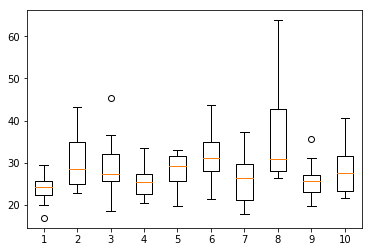

In [6]:
%matplotlib inline

rand_idx = np.random.choice(np.arange(train_size), 10)
rand_lid = lid_res[rand_idx]
plt.boxplot(rand_lid.transpose())
plt.show()

In [7]:
train_size = 50000
train_feat_file = './tmp/train_feat.data'
train_feat = torch.load(train_feat_file)
print(train_feat.shape)

b_size = 1000
n_times = 10
K = 100

lid_res = np.zeros((train_size, n_times))
for n in range(n_times):
    print('n_times: %d' % n)
    idx = np.arange(train_size)
    np.random.shuffle(idx)
    for k in range(train_size // b_size):
        print('    k: %d' % k)
        batch_idx = idx[k*b_size:(k+1)*b_size]
        X = train_feat[batch_idx]
        lid = LID(X, X, K)
        lid_res[batch_idx, n] = lid

(50000, 64)
n_times: 0
    k: 0
    k: 1
    k: 2
    k: 3
    k: 4
    k: 5
    k: 6
    k: 7
    k: 8
    k: 9
    k: 10
    k: 11
    k: 12
    k: 13
    k: 14
    k: 15
    k: 16
    k: 17
    k: 18
    k: 19
    k: 20
    k: 21
    k: 22
    k: 23
    k: 24
    k: 25
    k: 26
    k: 27
    k: 28
    k: 29
    k: 30
    k: 31
    k: 32
    k: 33
    k: 34
    k: 35
    k: 36
    k: 37
    k: 38
    k: 39
    k: 40
    k: 41
    k: 42
    k: 43
    k: 44
    k: 45
    k: 46
    k: 47
    k: 48
    k: 49
n_times: 1
    k: 0
    k: 1
    k: 2
    k: 3
    k: 4
    k: 5
    k: 6
    k: 7
    k: 8
    k: 9
    k: 10
    k: 11
    k: 12
    k: 13
    k: 14
    k: 15
    k: 16
    k: 17
    k: 18
    k: 19
    k: 20
    k: 21
    k: 22
    k: 23
    k: 24
    k: 25
    k: 26
    k: 27
    k: 28
    k: 29
    k: 30
    k: 31
    k: 32
    k: 33
    k: 34
    k: 35
    k: 36
    k: 37
    k: 38
    k: 39
    k: 40
    k: 41
    k: 42
    k: 43
    k: 44
    k: 45
    k: 46
    k: 47
    k:

In [8]:
lid_file = './tmp/train_lid_k100'

torch.save(lid_res, lid_file)

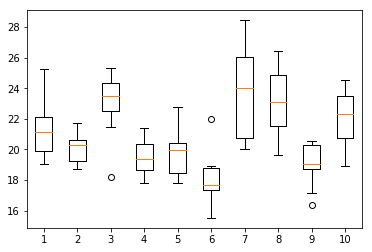

In [12]:
rand_idx = np.random.choice(np.arange(train_size), 10)
rand_lid = lid_res[rand_idx]
plt.boxplot(rand_lid.transpose())
plt.show()

Demonstrate images with max and min LIDs.

[11.90136676 11.99735163 12.24633945 12.3167077  12.32289303 12.42802334
 12.80300688 12.83610991 12.83898587 12.85066998 12.89838898 12.90263045
 12.90857482 12.94583061 12.95229256 12.99178417 13.00547253 13.0059699
 13.00620061 13.00695288 13.03347811 13.07222975 13.09819508 13.10116158
 13.13270936 13.14711645 13.16048444 13.18400952 13.18689736 13.19670735
 13.22571047 13.22763884 13.24408123 13.26277856 13.26617572 13.26855936
 13.28002477 13.30323324 13.31461857 13.32003981 13.36068324 13.36512789
 13.37831905 13.39269872 13.39577887 13.4098823  13.42512592 13.4659674
 13.48361271 13.50061258 13.50112546 13.51166762 13.54607944 13.54777188
 13.56035353 13.56305567 13.57025468 13.57644958 13.59426903 13.61578023
 13.62874879 13.6391359  13.64699295 13.66449739]


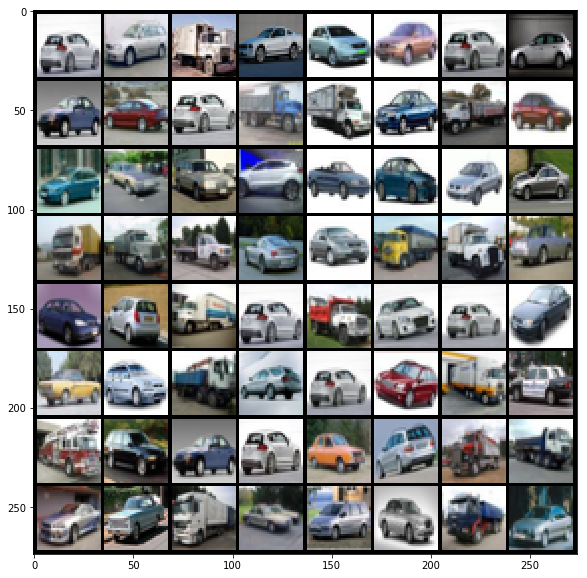

[25.69633756 25.70556992 25.71685948 25.72222284 25.72869216 25.73125972
 25.73261888 25.74005453 25.74542278 25.7462511  25.75778528 25.75796733
 25.7601011  25.76567493 25.7674681  25.78112669 25.82965314 25.83539184
 25.84538678 25.86590314 25.86879014 25.88508465 25.90457144 25.91932314
 25.93288173 25.93885386 25.94602656 25.9511384  25.9631941  25.99200943
 25.99246718 26.00740378 26.0197221  26.0294986  26.06663836 26.13127916
 26.13490419 26.13535002 26.17065525 26.17520652 26.18897788 26.19864626
 26.20916845 26.21148712 26.22768044 26.23847173 26.28823582 26.37510462
 26.38172825 26.45416628 26.45629246 26.46230116 26.46916681 26.47750198
 26.54058273 26.55935768 26.62523322 26.63976931 26.77767239 26.77768625
 26.78374769 27.06856523 27.17610158 27.71335226]


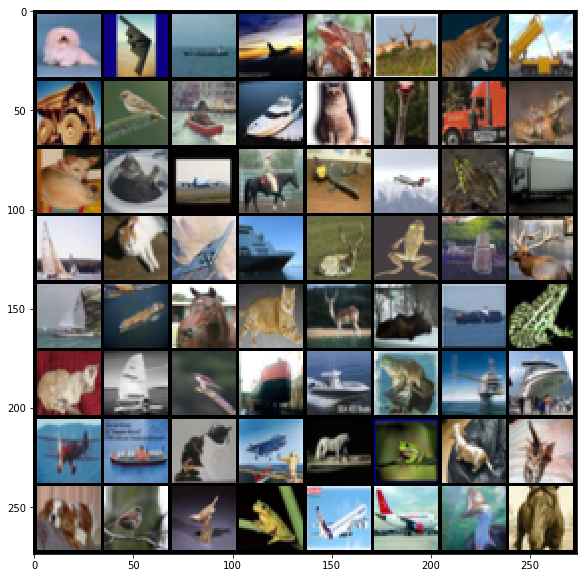

In [58]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

lid_vec = np.mean(lid_res, axis=1)
lid_idx = np.argsort(lid_vec)

M = 64
dataroot = 'd:\Lab\dataset'
train_dataset = torchvision.datasets.CIFAR10(root=dataroot, train=True, download=False, transform=transforms.ToTensor())

min_lid_img = []
for m in lid_idx[:M]:
    min_lid_img.append(train_dataset[m][0])
min_lid_img = torch.stack(min_lid_img)

print(lid_vec[lid_idx[:M]])
imshow(torchvision.utils.make_grid(min_lid_img))

max_lid_img = []
for m in lid_idx[-M:]:
    max_lid_img.append(train_dataset[m][0])
max_lid_img = torch.stack(max_lid_img)

print(lid_vec[lid_idx[-M:]])
imshow(torchvision.utils.make_grid(max_lid_img))

Demonstrate the LID distribution of each class.

In [37]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dist = [[] for _ in range(10)]
label_to_idx = [[] for _ in range(10)]
cnt = [0 for _ in range(10)]
for m in range(train_size):
    _, label = train_dataset[m]
    dist[label].append(lid_vec[m])
    label_to_idx[label].append(m)    
    cnt[label] += 1

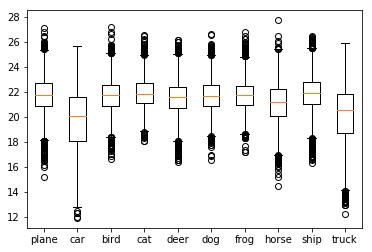

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


In [42]:
plt.boxplot(dist, labels=classes)
plt.show()
print(cnt)

Try different temporature T for sampling.

In [74]:
def _softmax(p, mask=None):
    ep = np.exp(p)
    if not mask is None:
        ep *= mask
    ep /= np.sum(ep)
    return ep

T: 0.050000
Annealed vec: [2.29320494e-084 1.06617173e-097 9.69431810e-112 ... 4.74729535e-065
 2.51001660e-075 6.79597828e-104]


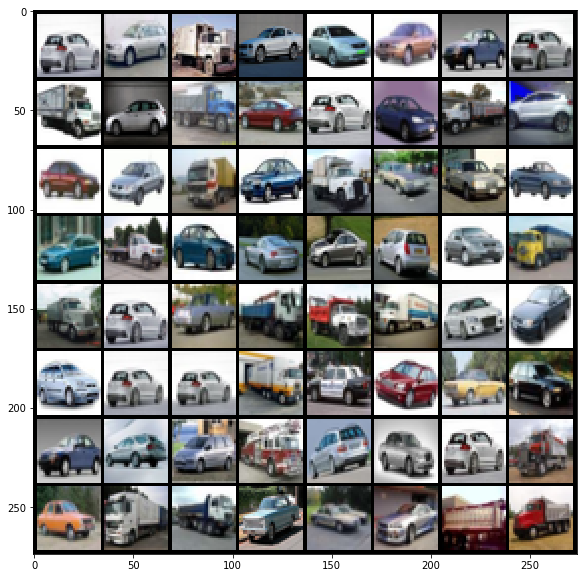

T: 0.100000
Annealed vec: [1.11824570e-42 2.41117862e-49 2.29918774e-56 ... 5.08790423e-33
 3.69959427e-38 1.92504902e-52]


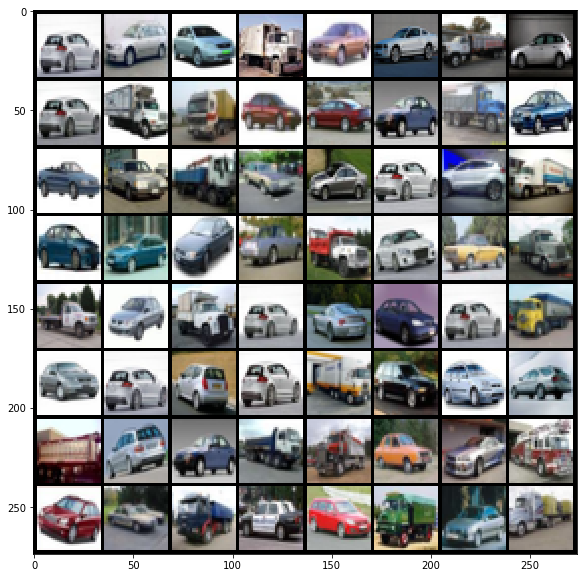

T: 0.500000
Annealed vec: [4.32529128e-10 2.00795414e-11 7.91813314e-13 ... 3.69501068e-08
 3.46687939e-09 4.82165654e-12]


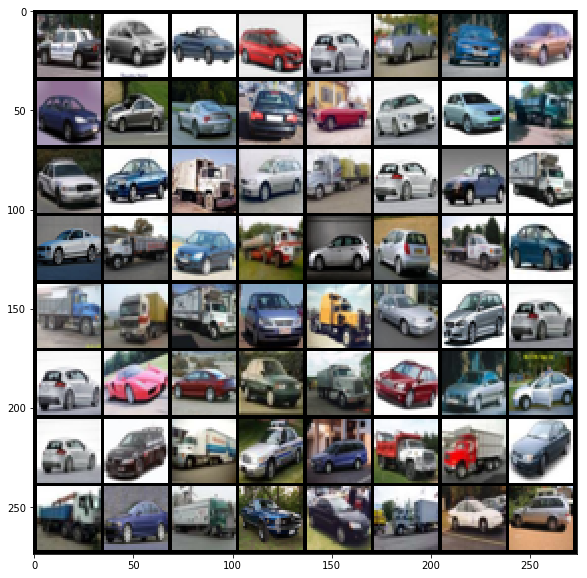

T: 1.000000
Annealed vec: [9.56312495e-07 2.06048304e-07 4.09169780e-08 ... 8.83893621e-06
 2.70745668e-06 1.00969519e-07]


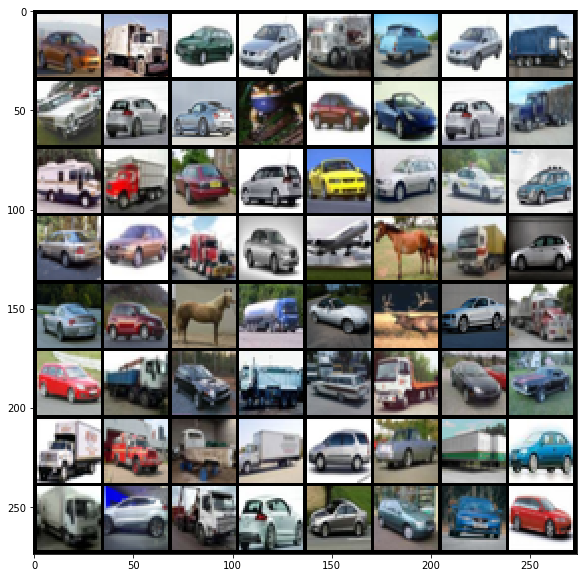

T: 2.000000
Annealed vec: [1.04098265e-05 4.83201307e-06 2.15325445e-06 ... 3.16478038e-05
 1.75155725e-05 3.38250713e-06]


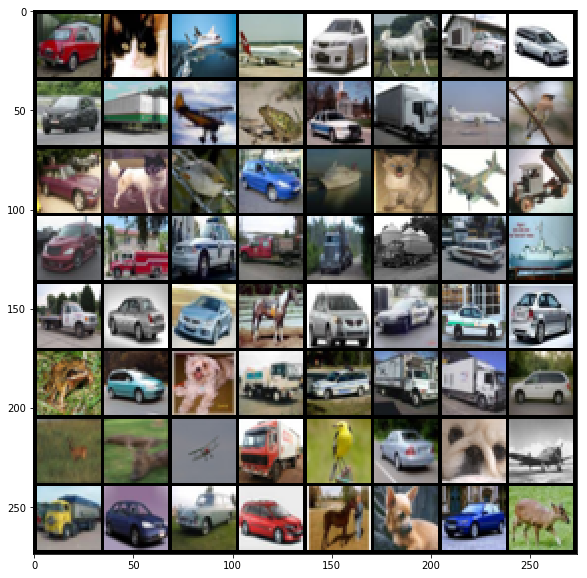

T: 5.000000
Annealed vec: [1.78986619e-05 1.31672296e-05 9.52974562e-06 ... 2.79241909e-05
 2.20400665e-05 1.14166492e-05]


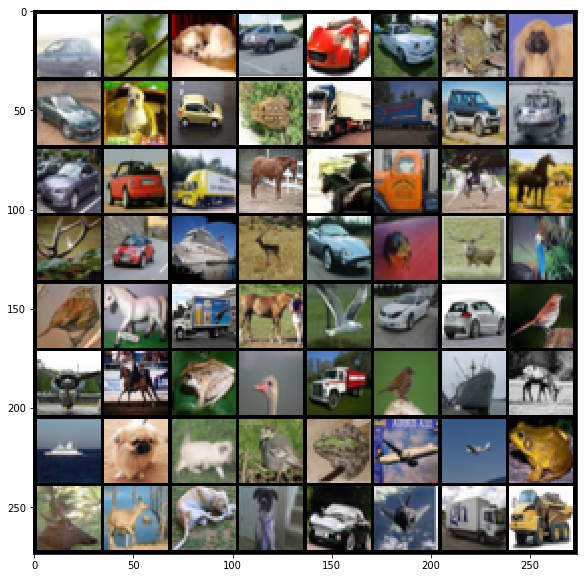

T: 10.000000
Annealed vec: [1.92753534e-05 1.65325282e-05 1.40647728e-05 ... 2.40758909e-05
 2.13893959e-05 1.53943514e-05]


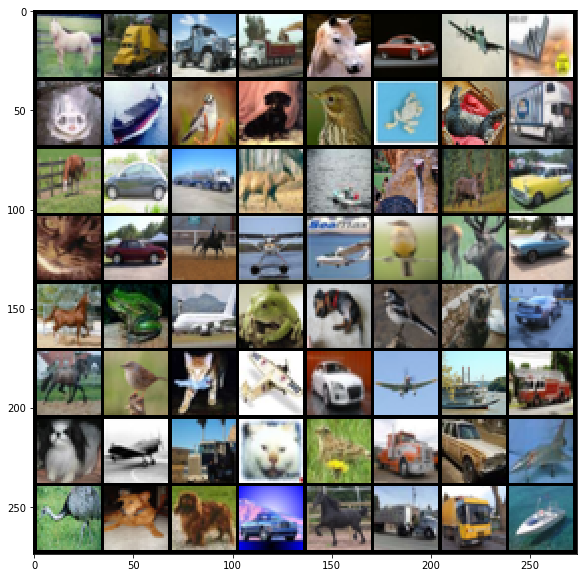

In [75]:
from torch.utils.data.sampler import  WeightedRandomSampler

for T in [0.05, 0.1, 0.5, 1, 2, 5, 10]:
    b_size = 64
    print('T: %f' % T)
    a_vec = _softmax(-lid_vec / T)
    print('Annealed vec: {}'.format(a_vec))
    sampler = WeightedRandomSampler(a_vec,\
                                    num_samples=b_size,\
                                    replacement=False)
    dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, shuffle=False,
                                            sampler=sampler)
    img, label = iter(dataloader).next()
    imshow(torchvision.utils.make_grid(img))

LID of some classes dominates when T is small. Now we apply lid sampling within each class.

T: 0.050000
torch.Size([80, 3, 32, 32])


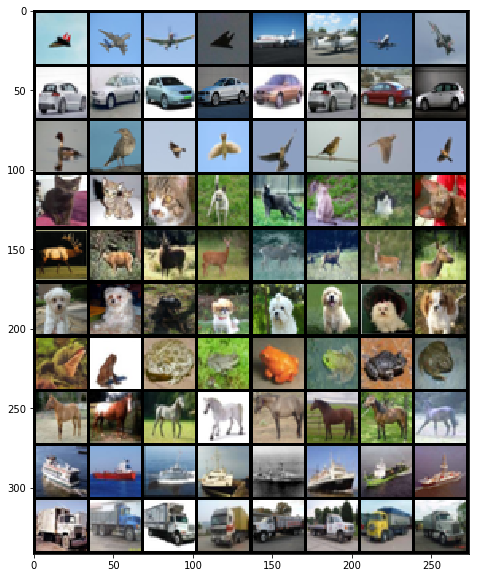

T: 0.100000
torch.Size([80, 3, 32, 32])


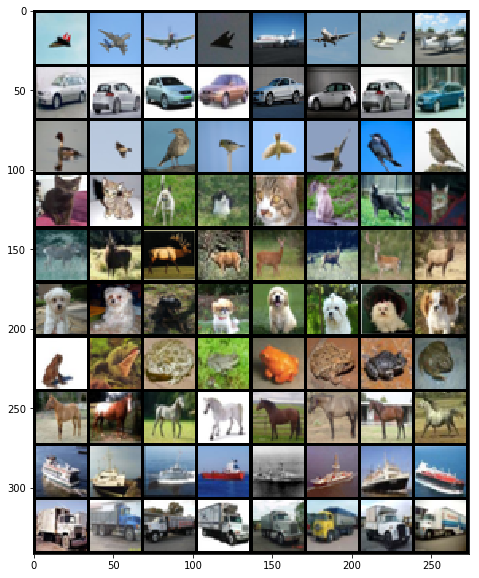

T: 0.500000
torch.Size([80, 3, 32, 32])


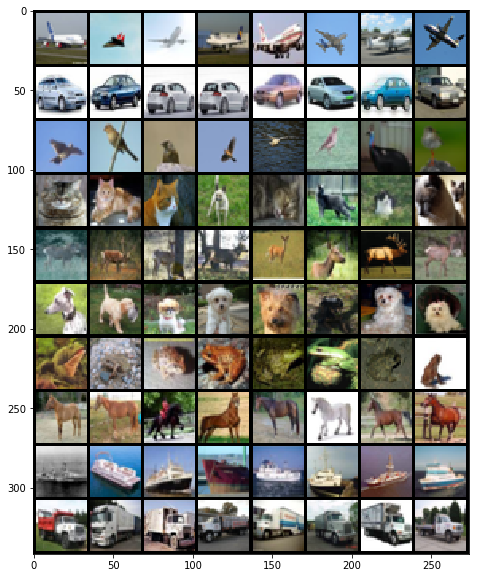

T: 1.000000
torch.Size([80, 3, 32, 32])


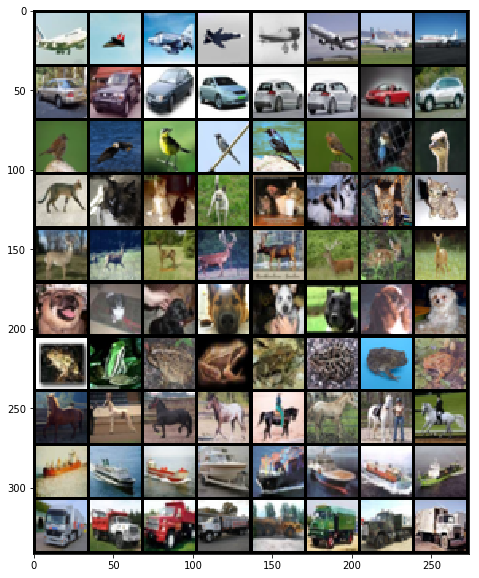

T: 2.000000
torch.Size([80, 3, 32, 32])


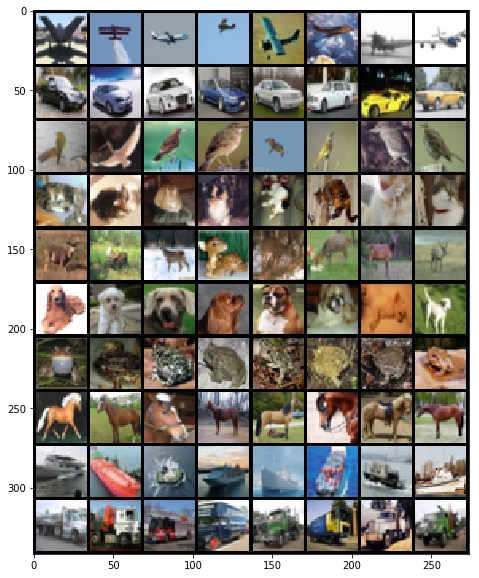

T: 5.000000
torch.Size([80, 3, 32, 32])


T: 10.000000
torch.Size([80, 3, 32, 32])


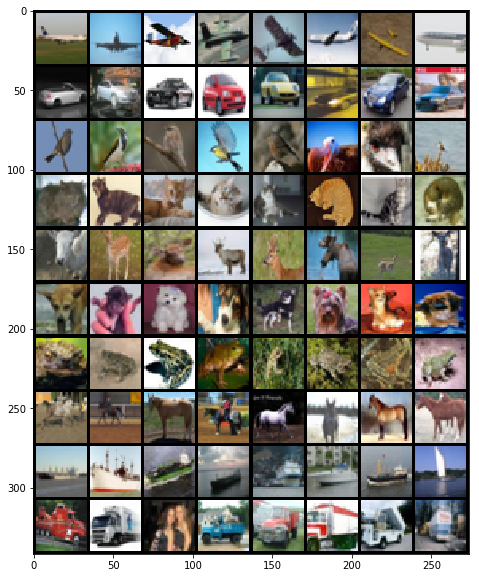

In [80]:
for T in [0.05, 0.1, 0.5, 1, 2, 5, 10]:
    b_size = 8
    print('T: %f' % T)
    imgs = []
    for c in range(10):
        mask = np.zeros(train_size)
        mask[np.array(label_to_idx[c])] = 1
        a_vec = _softmax(-lid_vec / T, mask)
        sampler = WeightedRandomSampler(a_vec,\
                                        num_samples=b_size,\
                                        replacement=False)
        dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, shuffle=False,
                                                sampler=sampler)
        img, label = iter(dataloader).next()
        imgs.append(img)
    imgs = np.concatenate(imgs)
    imgs = torch.from_numpy(imgs)
    print(imgs.shape)
    
    imshow(torchvision.utils.make_grid(imgs))